In [1]:
import pandas as pd
import numpy as np
from setuptools.command.rotate import rotate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from Supervised_Autoencoder_SAE import sae
import tensorflow as tf
from keras import models
import keras
import os
import warnings
from tqdm.notebook import tqdm
import  seaborn as sns
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore", category=UserWarning, module="keras")
name_df = 'df_autismo_clr'
result_path = os.path.join('./results', name_df)

tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()
np.random.seed(0)
tf.random.set_seed(800)
keras.utils.set_random_seed(800)

In [2]:
df = pd.read_csv(f'data/{name_df}.csv', index_col=0)
df

,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,OTU10,...,OTU1330,OTU1331,OTU1332,OTU1333,OTU1334,OTU1335,OTU1336,OTU1337,OTU1338,Diagnosis
0,-0.675933,-0.675933,-0.675933,-0.675933,-0.675933,0.017214,-0.675933,-0.675933,3.255893,-0.675933,...,-0.675933,0.017214,-0.675933,-0.675933,-0.675933,-0.675933,-0.675933,-0.675933,-0.675933,1
1,-0.744153,-0.744153,-0.744153,-0.744153,-0.744153,-0.744153,-0.744153,-0.744153,1.653742,0.354459,...,-0.744153,-0.744153,-0.744153,-0.744153,-0.744153,-0.744153,-0.744153,-0.744153,-0.744153,1
2,-0.809010,-0.809010,-0.809010,-0.809010,-0.115863,-0.809010,-0.809010,5.377198,1.830047,-0.809010,...,-0.809010,-0.809010,-0.809010,-0.809010,-0.809010,-0.809010,-0.809010,-0.809010,-0.809010,1
3,-0.777780,-0.777780,-0.777780,-0.777780,-0.777780,-0.777780,-0.084633,4.185064,2.112592,-0.777780,...,-0.084633,-0.777780,-0.777780,-0.777780,-0.777780,-0.777780,-0.777780,-0.777780,-0.777780,1
4,-0.680253,-0.680253,-0.680253,-0.680253,-0.680253,-0.680253,-0.680253,0.012894,1.622332,-0.680253,...,-0.680253,-0.680253,-0.680253,-0.680253,-0.680253,-0.680253,-0.680253,-0.680253,-0.680253,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-0.628816,-0.628816,-0.628816,-0.628816,-0.628816,0.064331,0.064331,-0.628816,-0.628816,-0.628816,...,-0.628816,-0.628816,-0.628816,-0.628816,-0.628816,-0.628816,-0.628816,-0.628816,-0.628816,0
250,-0.513036,-0.513036,-0.513036,-0.513036,-0.513036,-0.513036,-0.513036,2.745061,0.585577,-0.513036,...,-0.513036,-0.513036,-0.513036,-0.513036,-0.513036,-0.513036,-0.513036,-0.513036,-0.513036,0
251,-0.755277,-0.755277,-0.755277,-0.755277,-0.755277,-0.755277,-0.755277,2.289246,1.324165,-0.755277,...,-0.755277,-0.755277,-0.755277,-0.755277,-0.755277,-0.755277,-0.755277,-0.755277,-0.755277,0
252,-0.549090,-0.549090,-0.549090,0.144057,-0.549090,-0.549090,0.144057,-0.549090,2.089967,-0.549090,...,-0.549090,-0.549090,-0.549090,-0.549090,-0.549090,-0.549090,-0.549090,-0.549090,-0.549090,0


In [3]:
# number of raw
rows = len(df)
rows

254

In [4]:
# Plot the distribution of the label
'Class 1:', len(df[df['Diagnosis'] == 1]), 'Class 0:', len(df[df['Diagnosis'] == 0])

('Class 1:', 143, 'Class 0:', 111)

In [5]:
X = df.copy(deep=True)
X

,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,OTU10,...,OTU1330,OTU1331,OTU1332,OTU1333,OTU1334,OTU1335,OTU1336,OTU1337,OTU1338,Diagnosis
0,-0.675933,-0.675933,-0.675933,-0.675933,-0.675933,0.017214,-0.675933,-0.675933,3.255893,-0.675933,...,-0.675933,0.017214,-0.675933,-0.675933,-0.675933,-0.675933,-0.675933,-0.675933,-0.675933,1
1,-0.744153,-0.744153,-0.744153,-0.744153,-0.744153,-0.744153,-0.744153,-0.744153,1.653742,0.354459,...,-0.744153,-0.744153,-0.744153,-0.744153,-0.744153,-0.744153,-0.744153,-0.744153,-0.744153,1
2,-0.809010,-0.809010,-0.809010,-0.809010,-0.115863,-0.809010,-0.809010,5.377198,1.830047,-0.809010,...,-0.809010,-0.809010,-0.809010,-0.809010,-0.809010,-0.809010,-0.809010,-0.809010,-0.809010,1
3,-0.777780,-0.777780,-0.777780,-0.777780,-0.777780,-0.777780,-0.084633,4.185064,2.112592,-0.777780,...,-0.084633,-0.777780,-0.777780,-0.777780,-0.777780,-0.777780,-0.777780,-0.777780,-0.777780,1
4,-0.680253,-0.680253,-0.680253,-0.680253,-0.680253,-0.680253,-0.680253,0.012894,1.622332,-0.680253,...,-0.680253,-0.680253,-0.680253,-0.680253,-0.680253,-0.680253,-0.680253,-0.680253,-0.680253,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-0.628816,-0.628816,-0.628816,-0.628816,-0.628816,0.064331,0.064331,-0.628816,-0.628816,-0.628816,...,-0.628816,-0.628816,-0.628816,-0.628816,-0.628816,-0.628816,-0.628816,-0.628816,-0.628816,0
250,-0.513036,-0.513036,-0.513036,-0.513036,-0.513036,-0.513036,-0.513036,2.745061,0.585577,-0.513036,...,-0.513036,-0.513036,-0.513036,-0.513036,-0.513036,-0.513036,-0.513036,-0.513036,-0.513036,0
251,-0.755277,-0.755277,-0.755277,-0.755277,-0.755277,-0.755277,-0.755277,2.289246,1.324165,-0.755277,...,-0.755277,-0.755277,-0.755277,-0.755277,-0.755277,-0.755277,-0.755277,-0.755277,-0.755277,0
252,-0.549090,-0.549090,-0.549090,0.144057,-0.549090,-0.549090,0.144057,-0.549090,2.089967,-0.549090,...,-0.549090,-0.549090,-0.549090,-0.549090,-0.549090,-0.549090,-0.549090,-0.549090,-0.549090,0


In [6]:
y = X.pop('Diagnosis')
y

0      1
1      1
2      1
3      1
4      1
      ..
249    0
250    0
251    0
252    0
253    0
Name: Diagnosis, Length: 254, dtype: int64

In [7]:
X.shape, y.shape, df.shape

((254, 1322), (254,), (254, 1323))

Configure an unique alpha

In [8]:
alpha = .0

## With all the dataframe

In [9]:
percentages = [0, 10, 20, 30, 40, 50, 60, 70]

blinds = [ int((len(df) / 100 * per)/2) for per in percentages]
percentages, blinds

([0, 10, 20, 30, 40, 50, 60, 70], [0, 12, 25, 38, 50, 63, 76, 88])

In [10]:
n_splits = 5

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
all_mean_results = {key: {
    'macro avg precision': [],
    'macro avg recall': [],
    'macro avg f1-score': [],
    'weighted avg precision': [],
    'weighted avg recall': [],
    'weighted avg f1-score': [],
} for key in percentages }


In [11]:
for fold, (train_index, test_index) in tqdm(enumerate(skf.split(X, y), 1), total=n_splits):
    X_train, X_val = X[X.index.isin(train_index)], X[X.index.isin(test_index)]
    y_train, y_val = y[train_index], y[test_index]
        
    index_0 = []
    index_1 = []
    blinded = 0
    for percentage, blind in tqdm(zip(percentages, blinds), total=len(percentages)):
        y_train_ssae = y_train.copy(deep=True)
        to_blind = blind - blinded
        
        if percentage != 0:
            index = y_train_ssae[y_train_ssae == 0].index.to_numpy()
            index = [x for x in index if x not in index_0]
            index = np.random.choice(index, size=to_blind, replace=False)
            index_0.extend(index)
            
            y_train_ssae[y_train_ssae.index.isin(index_0)] = None
            index = y_train_ssae[y_train_ssae == 1].index.tolist()
            index = [x for x in index if x not in index_1]
            
            index = np.random.choice(index, size=to_blind, replace=False)
            index_1.extend(index)
            y_train_ssae[y_train_ssae.index.isin(index_1)] = None
        
        blinded = blind
        
        autoencoder = sae(
            input_shape=X_train.shape[1], 
            encoder_shape0=128,
            encoder_shape1=64,
            alpha=alpha
        )
        
        autoencoder.fit(
            X_train, (X_train, y_train_ssae),
            validation_data=(X_val, (X_val, y_val)),
            epochs=200, 
            batch_size=100, 
            verbose=0,
            callbacks=keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=20,
                verbose=0,
                restore_best_weights=True,
                mode='min',
            ),
        )
    
        encoder = models.Model(
            inputs=autoencoder.input,
            outputs=autoencoder.get_layer('layer_reduced').output
        )
        
        latent_train = encoder.predict(X_train, verbose=0)
        latent_val = encoder.predict(X_val, verbose=0)
    
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(latent_train, y_train)
        y_pred = rf.predict(latent_val)
    
        report = classification_report(y_val, y_pred, output_dict=True, zero_division=0)
        for metric in all_mean_results[percentage].keys():
            if 'macro' in metric:
                all_mean_results[percentage][metric].append(report['macro avg'][metric.split()[-1]])
            elif 'weighted' in metric:
                all_mean_results[percentage][metric].append(report['weighted avg'][metric.split()[-1]])
    
try:
    os.makedirs(result_path)
except:
    pass

result_df = None
for key, metrics in all_mean_results.items():
    mean_results = {metric: round(np.mean(values), 2) for metric, values in metrics.items()}
    
    res = pd.DataFrame([mean_results])
    if key == 0:
        res['Percentage reduction'] = f"SAE - {key}%"
    else:
        res['Percentage reduction'] = f"SSAE - {key}%"
    
    if result_df is None:
        result_df = res
    else:
        result_df = pd.concat([result_df, res], ignore_index=True)

result_df

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

,macro avg precision,macro avg recall,macro avg f1-score,weighted avg precision,weighted avg recall,weighted avg f1-score,Percentage reduction
0,0.84,0.83,0.83,0.84,0.83,0.83,SAE - 0%
1,0.84,0.82,0.82,0.83,0.83,0.82,SSAE - 10%
2,0.79,0.78,0.78,0.79,0.79,0.78,SSAE - 20%
3,0.82,0.81,0.81,0.82,0.82,0.82,SSAE - 30%
4,0.78,0.77,0.78,0.78,0.78,0.78,SSAE - 40%
5,0.83,0.81,0.81,0.83,0.81,0.81,SSAE - 50%
6,0.86,0.84,0.85,0.86,0.85,0.85,SSAE - 60%
7,0.80,0.78,0.78,0.79,0.79,0.79,SSAE - 70%


In [12]:
result_df.to_csv(result_path + f'/results_SSAE_alpha={alpha}.csv')

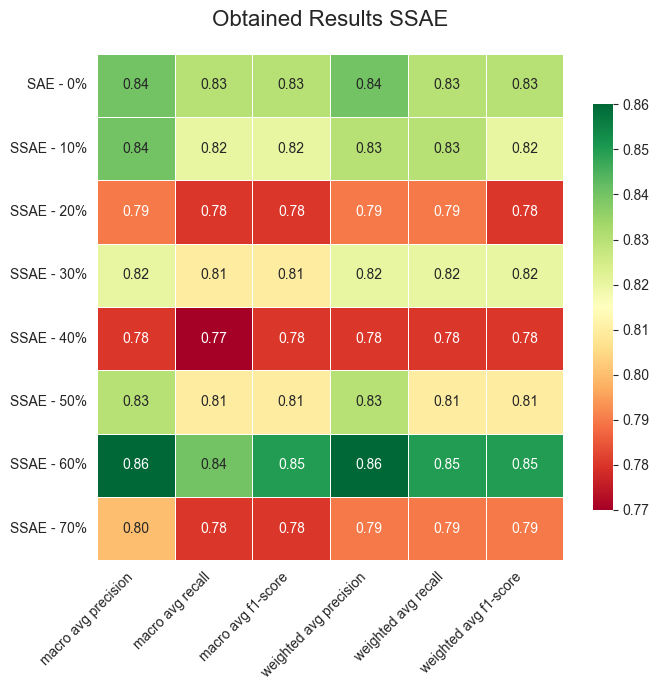

In [13]:
result_path = os.path.join(result_path, "results_heatmap")
try:
    os.makedirs(result_path, exist_ok=True)
except:
    pass

plt.figure(figsize=(7, 7))
sns.heatmap(
    result_df[result_df.columns.values[:-1]],
    cmap="RdYlGn",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    yticklabels=result_df[result_df.columns.values[-1]],
)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)

plt.title("Obtained Results SSAE", fontsize=16, pad=20)

plt.tight_layout()
plt.savefig(result_path + f'/results_SSAE_alpha={alpha}.png')
plt.show()